## Machine Learning
### TP3: Principal Component Analysis

#Step 1 Import the Necessary Modules

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Step 2: Obtain the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ML-2023/Automobile.csv')

Mounted at /content/drive


In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


# Step 3: Preview Your Data

In [ ]:
print(df.columns)
print(df.dtypes)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')
symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                obje

# Step 4: Center and Perform Scaling on the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
features = ['highway-mpg', 'engine-size', 'wheel-base', 'curb-weight']
x = df.loc[:, features].values
y = df.loc[:, ['make']].values
x = StandardScaler().fit_transform(x)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


# Step 5:  Perform PCA

In [ ]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
print(principalDataframe)

          PC1       PC2       PC3       PC4
0   -0.484198  1.669631 -0.134679  0.349841
1   -0.484198  1.669631 -0.134679  0.349841
2    0.594660  1.093059  0.061546  0.241339
3   -0.314244 -0.226792 -0.431666 -0.261738
4    1.061049  0.564475 -0.710513 -0.003154
..        ...       ...       ...       ...
200  1.576637 -1.134015 -0.183157 -0.132458
201  1.891282 -0.935033 -0.474226 -0.084813
202  2.377912 -0.546567 -0.144458 -0.516984
203  1.976471 -1.043544 -0.177501  0.217795
204  1.905075 -0.935448 -0.472255 -0.064026

[205 rows x 4 columns]


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns= ['PC1', 'PC2', 'PC3', 'PC4'],  # so the columns are the principal components
    index=features,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4
highway-mpg,-0.484831,-0.462736,0.700187,0.246073
engine-size,0.499446,0.327869,0.700002,-0.391220
wheel-base,0.460204,-0.823470,-0.116336,-0.310767
curb-weight,0.551094,-0.016581,0.078748,0.830553


# Step 6: Combine the Target and the Principal Components

In [ ]:
targetDataframe = df[['make']]
newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)
print(newDataframe)

          PC1       PC2       PC3       PC4         make
0   -0.484198  1.669631 -0.134679  0.349841  alfa-romero
1   -0.484198  1.669631 -0.134679  0.349841  alfa-romero
2    0.594660  1.093059  0.061546  0.241339  alfa-romero
3   -0.314244 -0.226792 -0.431666 -0.261738         audi
4    1.061049  0.564475 -0.710513 -0.003154         audi
..        ...       ...       ...       ...          ...
200  1.576637 -1.134015 -0.183157 -0.132458        volvo
201  1.891282 -0.935033 -0.474226 -0.084813        volvo
202  2.377912 -0.546567 -0.144458 -0.516984        volvo
203  1.976471 -1.043544 -0.177501  0.217795        volvo
204  1.905075 -0.935448 -0.472255 -0.064026        volvo

[205 rows x 5 columns]


# Step 7: Perform a Scree Plot of the Principal Components

[78.02 12.08  8.09  1.81]


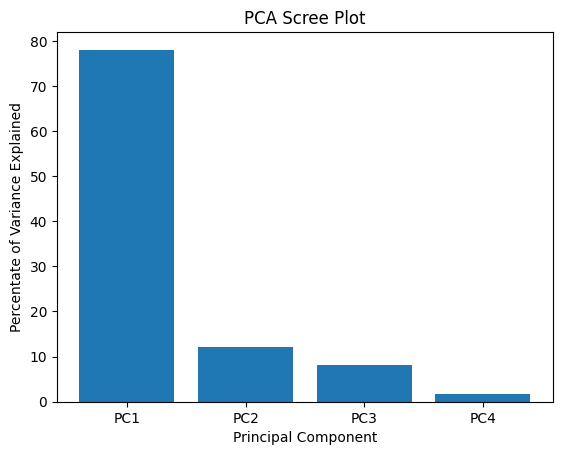

In [ ]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4']
print(percent_variance)
plt.bar(x= range(1,5), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

# Step 8: Plot the Principal Components on 2D

Text(0, 0.5, 'PC2')

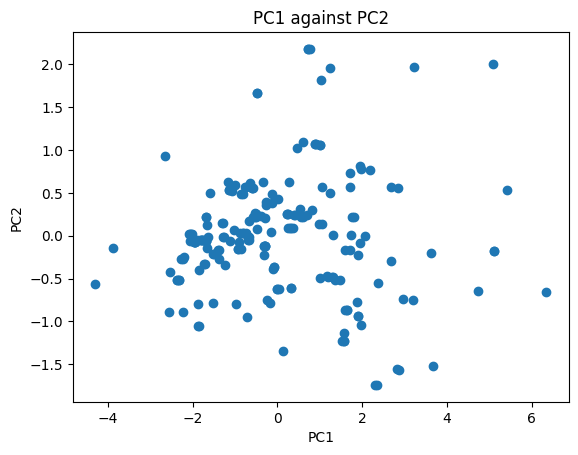

In [ ]:
plt.scatter(principalDataframe.PC1, principalDataframe.PC2)
plt.title('PC1 against PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')

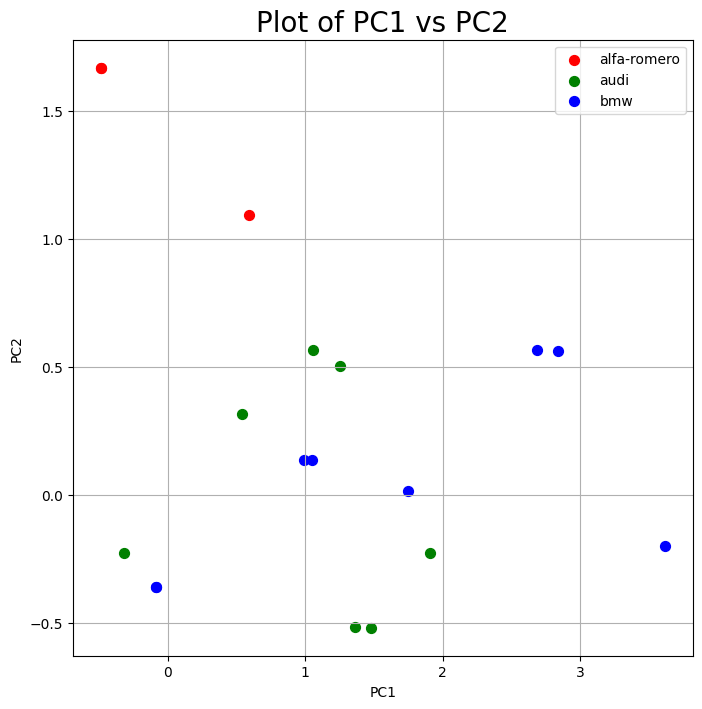

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = df['make'].unique()

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['make'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()

# Step 9: Visualizing Further the Explained Variance Using Principal Component

In [ ]:
pca.explained_variance_ratio_

array([0.78019876, 0.1208032 , 0.08085512, 0.01814292])

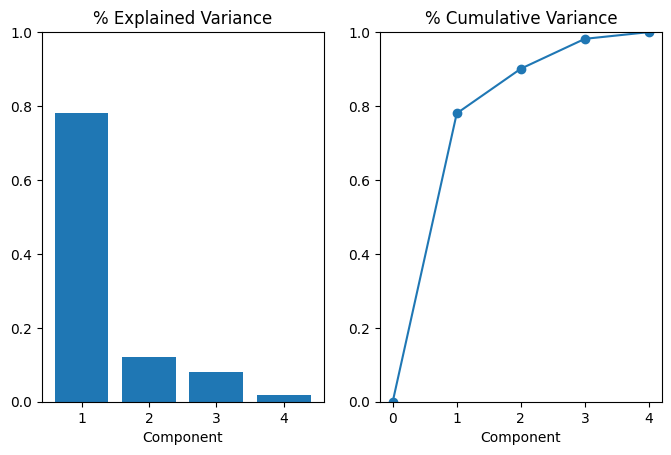

In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs


# Look at explained variance
plot_variance(pca);